In [14]:
import pandas as pd
import numpy as np

#以日期Date作为索引，并自动解析日期
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [15]:
#可以先来查看一下这三列的统计值
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,137777.000000,137777.000000,137777.000000
mean,112.490771,51.267004,61.223767
std,143.132406,65.992109,89.076846
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

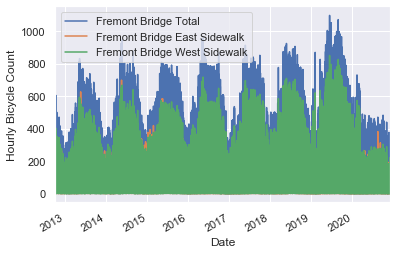

In [16]:
#1、数据可视化
#首先画出最原始的自行车流量统计图
%matplotlib inline
import seaborn as sns;
import matplotlib.pyplot as plt
sns.set();

data.plot()
plt.ylabel('Hourly Bicycle Count')

In [17]:
#为了便于操作，简化一下列名
data.columns = ['Total','East','West']

Text(0, 0.5, 'weekly bicycle count')

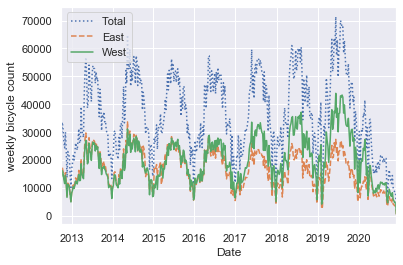

In [18]:
#第一个图是以每个小时为单位来统计的，这个粒度过于细微，可以换成以周围单位来统计
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('weekly bicycle count')

从上图中可以看出一些规律，在每年的中部时间段，总车流量呈现一个峰值，在年初和年末比较少，因为夏天选择企自行车出行的人会比较多。
而从2020年一部分激增之后，又立马递减，是因为疫情原因，最开始人们选择避开公共交通，到后面完全自我隔离在家里。

Text(0, 0.5, 'mean of 90 days count')

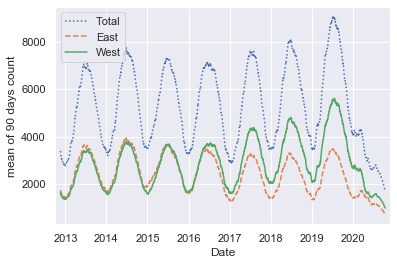

In [19]:
#在以90天（一个季度）为移动窗口,计算移动窗口的平均值，并让图像居中显示center=True
daily = data.resample('D').sum()
daily.rolling(90,center=True).mean().plot(style=[':','--','-'])
plt.ylabel('mean of 90 days count')

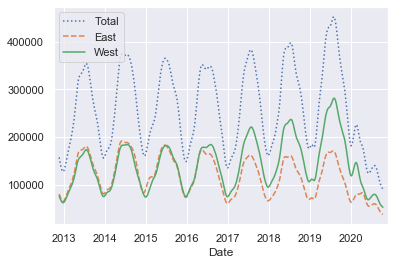

In [20]:
#如果为了使图像更加平滑，可以采用高斯分布时间窗口，设置窗口宽度为100天，窗口内平滑宽度20天
daily.rolling(100,center=True,
             win_type='gaussian').sum(std=20).plot(style=[':','--','-'])

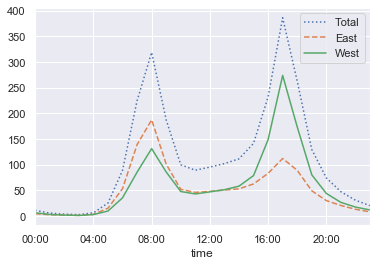

In [21]:
#2、细节分析
#在知道总体趋势之后，可以分析单日内小时均值的流量，可以通过groupby操作来对一天24小时中不同的小时分组
by_time = data.groupby(data.index.time).mean()#对小时进行分组后取均值
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks,style=[':','--','-'])

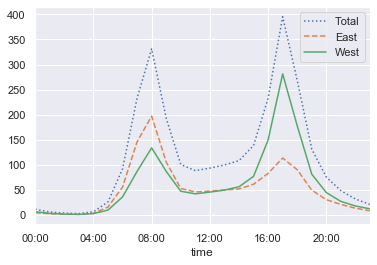

In [38]:
#如果需要排除2020年数据的干扰，可以先对data进行处理,可以看出数值大小上略有上升
import time
import datetime

data1 = data[data.index <= '2020-01-01 00:00:00']
by_time = data1.groupby(data1.index.time).mean()#对小时进行分组后取均值
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks,style=[':','--','-'])

可以看出早晚自行车流量的峰值在早8点和晚5点左右

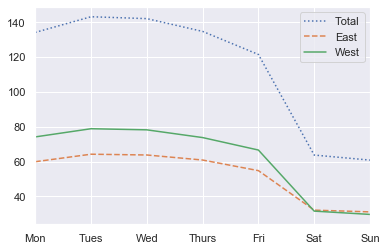

In [39]:
#还课可以分析每周不同星期数之间的流量关系
by_weekday = data1.groupby(data1.index.dayofweek).mean()
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']   
by_weekday.plot(style=[':','--','-'])

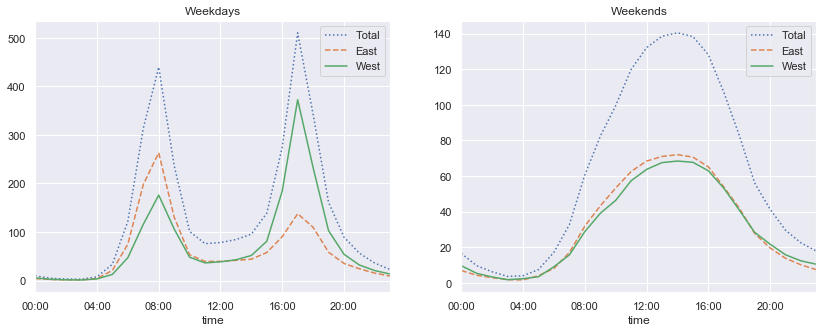

In [51]:
#可以在此基础上进一步探究，工作日与非工作日时不同小时内车流量的大小
weekend = np.where(data1.index.weekday < 5,'Weekday','Weekend')
by_time = data1.groupby([weekend,data1.index.time]).mean()   #复合分组

hourly_ticks = 4*60*60*np.arange(6)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(14,5))
by_time.loc['Weekday'].plot(ax = ax[0],title='Weekdays',xticks=hourly_ticks,style=[':','--','-'])
by_time.loc['Weekend'].plot(ax = ax[1],title='Weekends',xticks=hourly_ticks,style=[':','--','-'])

可见在工作日时，自行车流量是双峰分布，而在非工作日时，流量是单峰模式